In [3]:
#Projeção IDHM

import pandas as pd
import numpy as np

# Definir o arquivo de entrada
arquivo_entrada = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/idhm_subpref_anos.xlsx"  # ou "idhm_subpref_anos.xlsx.csv"

# Carregar o arquivo Excel ou CSV
try:
    if arquivo_entrada.endswith(".xlsx"):
        df = pd.read_excel(arquivo_entrada)
    else:
        df = pd.read_csv(arquivo_entrada)
except FileNotFoundError:
    print(f"Erro: Arquivo '{arquivo_entrada}' não encontrado. Verifique o nome e tente novamente.")
    exit()

# Criar previsões para 2020
for indicador in ["IDHM", "IDHM_Renda", "IDHM_Educacao"]:
    df[f"{indicador}_Linear_2020"] = df[f"{indicador}_2010"] + (df[f"{indicador}_2010"] - df[f"{indicador}_2000"])

    # Modelo Exponencial
    df[f"{indicador}_r"] = np.log(df[f"{indicador}_2010"] / df[f"{indicador}_2000"]) / 10
    df[f"{indicador}_Exp_2020"] = df[f"{indicador}_2000"] * np.exp(df[f"{indicador}_r"] * 20)

# Salvar a saída em um novo arquivo
arquivo_saida = "idhm_projecao_2020.xlsx"
df.to_excel(arquivo_saida, index=False)

print(f"Projeção concluída! Arquivo salvo como: {arquivo_saida}")

Projeção concluída! Arquivo salvo como: idhm_projecao_2020.xlsx


In [4]:
#Estrutura do Dataset

import pandas as pd

# Caminhos dos arquivos
caminho_ideb_iniciais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_iniciais.xlsx"
caminho_ideb_finais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_finais.xlsx"
caminho_idhm = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/idhm_subpref_anos.xlsx"

# Leitura dos datasets
ideb_iniciais = pd.read_excel(caminho_ideb_iniciais)
ideb_finais = pd.read_excel(caminho_ideb_finais)
idhm = pd.read_excel(caminho_idhm)

# Função de análise básica
def analisar_dataset(nome, df):
    print(f"\nAnálise do dataset: {nome}")
    print(f"- Total de linhas: {df.shape[0]}")
    print(f"- Total de colunas: {df.shape[1]}")
    print(f"- Tipos de dados:\n{df.dtypes}")
    print(f"- Valores ausentes: {df.isnull().sum().sum()}")
    print(f"- Registros duplicados: {df.duplicated().sum()}")

# Executar análise para cada dataset
analisar_dataset("IDEB - Anos Iniciais", ideb_iniciais)
analisar_dataset("IDEB - Anos Finais", ideb_finais)
analisar_dataset("IDHM", idhm)


Análise do dataset: IDEB - Anos Iniciais
- Total de linhas: 560
- Total de colunas: 12
- Tipos de dados:
Código da Escola        int64
Nome da Escola         object
Prefeitura Regional    object
IDEB_2005_iniciais     object
IDEB_2009_iniciais     object
IDEB_2011_iniciais     object
IDEB_2013_iniciais     object
IDEB_2015_iniciais     object
IDEB_2017_iniciais     object
IDEB_2019_iniciais     object
IDEB_2021_iniciais     object
IDEB_2023_iniciais     object
dtype: object
- Valores ausentes: 0
- Registros duplicados: 0

Análise do dataset: IDEB - Anos Finais
- Total de linhas: 551
- Total de colunas: 12
- Tipos de dados:
Código da Escola        int64
Nome da Escola         object
Prefeitura Regional    object
IDEB_2005_finais       object
IDEB_2009_finais       object
IDEB_2011_finais       object
IDEB_2013_finais       object
IDEB_2015_finais       object
IDEB_2017_finais       object
IDEB_2019_finais       object
IDEB_2021_finais       object
IDEB_2023_finais       object
dtype: o

In [5]:
#Medidas de posição dispersão do IDEB

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Criar pasta de saída para resultados
output_dir = "resultados_analise"
os.makedirs(output_dir, exist_ok=True)

# Carregar os arquivos
file_idhm = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/idhm_subpref_anos.xlsx"
file_ideb_finais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_finais.xlsx"
file_ideb_iniciais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_iniciais.xlsx"

idhm_df = pd.read_excel(file_idhm, sheet_name="subprefeitura")
ideb_finais_df = pd.read_excel(file_ideb_finais, sheet_name="Sheet1")
ideb_iniciais_df = pd.read_excel(file_ideb_iniciais, sheet_name="Sheet1")

# Converter para numérico e tratar valores ausentes
ideb_cols_finais_2000 = ["IDEB_2005_finais", "IDEB_2009_finais"]
ideb_cols_finais_2010 = ["IDEB_2011_finais", "IDEB_2013_finais", "IDEB_2015_finais", "IDEB_2017_finais", "IDEB_2019_finais"]
ideb_cols_finais_2020 = ["IDEB_2021_finais", "IDEB_2023_finais"]

ideb_cols_iniciais_2000 = ["IDEB_2005_iniciais", "IDEB_2009_iniciais"]
ideb_cols_iniciais_2010 = ["IDEB_2011_iniciais", "IDEB_2013_iniciais", "IDEB_2015_iniciais", "IDEB_2017_iniciais", "IDEB_2019_iniciais"]
ideb_cols_iniciais_2020 = ["IDEB_2021_iniciais", "IDEB_2023_iniciais"]

for col in ideb_cols_finais_2000 + ideb_cols_finais_2010 + ideb_cols_finais_2020:
    if col in ideb_finais_df.columns:
        ideb_finais_df[col] = pd.to_numeric(ideb_finais_df[col], errors='coerce')
for col in ideb_cols_iniciais_2000 + ideb_cols_iniciais_2010 + ideb_cols_iniciais_2020:
    if col in ideb_iniciais_df.columns:
        ideb_iniciais_df[col] = pd.to_numeric(ideb_iniciais_df[col], errors='coerce')

# Calcular a média do IDEB por Prefeitura Regional
ideb_finais_media_2000 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2000].mean().reset_index()
ideb_finais_media_2010 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2010].mean().reset_index()
ideb_finais_media_2020 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2020].mean().reset_index()

ideb_iniciais_media_2000 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2000].mean().reset_index()
ideb_iniciais_media_2010 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2010].mean().reset_index()
ideb_iniciais_media_2020 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2020].mean().reset_index()

# Unir com os dados do IDHM
idhm_2000 = idhm_df[["Prefeitura Regional", "IDHM_2000", "IDHM_Renda_2000", "IDHM_Educacao_2000"]]
idhm_2010 = idhm_df[["Prefeitura Regional", "IDHM_2010", "IDHM_Renda_2010", "IDHM_Educacao_2010"]]
idhm_2020 = idhm_df[["Prefeitura Regional", "IDHM_2020", "IDHM_Renda_2020", "IDHM_Educacao_2020"]]

def merge_and_analyze(ideb_df, idhm_df, title):
    df = pd.merge(ideb_df, idhm_df, on="Prefeitura Regional", how="inner")
    print(f"\nEstatísticas descritivas - {title}")
    print(df.describe())

    # Salvar planilha com dados combinados
    df.to_excel(os.path.join(output_dir, f"dados_{title.replace(' ', '_')}.xlsx"), index=False)

    # Correlação
    df_corr = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 5))
    sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlação {title}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"heatmap_correlacao_{title.replace(' ', '_')}.png"))
    plt.close()

    # Dispersão IDEB vs IDHM
    for ideb_col in [col for col in df.columns if "IDEB" in col]:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[ideb_col], y=df["IDHM_" + title[-4:]], alpha=0.7)
        plt.title(f"{ideb_col} vs IDHM {title[-4:]}")
        plt.xlabel(ideb_col)
        plt.ylabel(f"IDHM {title[-4:]}")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"scatter_{ideb_col}_vs_IDHM_{title[-4:]}.png"))
        plt.close()

    # Outras medidas de dispersão
    amplitude = df.max(numeric_only=True) - df.min(numeric_only=True)
    coef_var = (df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100
    amplitude.to_excel(os.path.join(output_dir, f"amplitude_{title.replace(' ', '_')}.xlsx"))
    coef_var.to_excel(os.path.join(output_dir, f"coef_variacao_{title.replace(' ', '_')}.xlsx"))

    # Histogramas
    df.select_dtypes(include='number').hist(figsize=(15, 10), bins=10, edgecolor='black')
    plt.suptitle(f"Histogramas - {title}")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(os.path.join(output_dir, f"histogramas_{title.replace(' ', '_')}.png"))
    plt.close()

    # Tabela de frequência (Prefeitura Regional)
    freq = df["Prefeitura Regional"].value_counts()
    freq.to_excel(os.path.join(output_dir, f"frequencia_prefeitura_{title.replace(' ', '_')}.xlsx"))

# Análises para cada período
merge_and_analyze(ideb_finais_media_2000, idhm_2000, "IDEB (Anos Finais) e IDHM 2000")
merge_and_analyze(ideb_iniciais_media_2000, idhm_2000, "IDEB (Anos Iniciais) e IDHM 2000")
merge_and_analyze(ideb_finais_media_2010, idhm_2010, "IDEB (Anos Finais) e IDHM 2010")
merge_and_analyze(ideb_iniciais_media_2010, idhm_2010, "IDEB (Anos Iniciais) e IDHM 2010")
merge_and_analyze(ideb_finais_media_2020, idhm_2020, "IDEB (Anos Finais) e IDHM 2020")
merge_and_analyze(ideb_iniciais_media_2020, idhm_2020, "IDEB (Anos Iniciais) e IDHM 2020")


Estatísticas descritivas - IDEB (Anos Finais) e IDHM 2000
       IDEB_2005_finais  IDEB_2009_finais  IDHM_2000  IDHM_Renda_2000  \
count         28.000000         28.000000  28.000000        28.000000   
mean           4.143426          4.194572   0.728179         0.777036   
std            0.282413          0.268099   0.086244         0.106781   
min            3.600000          3.566667   0.593000         0.645000   
25%            3.978750          4.011957   0.657500         0.700500   
50%            4.114762          4.202083   0.717000         0.755500   
75%            4.304545          4.372321   0.768750         0.832000   
max            4.666667          4.700000   0.910000         1.000000   

       IDHM_Educacao_2000  
count           28.000000  
mean             0.619179  
std              0.104531  
min              0.436000  
25%              0.537750  
50%              0.607000  
75%              0.665750  
max              0.851000  

Estatísticas descritivas - IDE


Estatísticas descritivas - IDEB (Anos Finais) e IDHM 2000
       IDEB_2005_finais  IDEB_2009_finais  IDHM_2000  IDHM_Renda_2000  \
count         28.000000         28.000000  28.000000        28.000000   
mean           4.143426          4.194572   0.728179         0.777036   
std            0.282413          0.268099   0.086244         0.106781   
min            3.600000          3.566667   0.593000         0.645000   
25%            3.978750          4.011957   0.657500         0.700500   
50%            4.114762          4.202083   0.717000         0.755500   
75%            4.304545          4.372321   0.768750         0.832000   
max            4.666667          4.700000   0.910000         1.000000   

       IDHM_Educacao_2000  
count           28.000000  
mean             0.619179  
std              0.104531  
min              0.436000  
25%              0.537750  
50%              0.607000  
75%              0.665750  
max              0.851000  


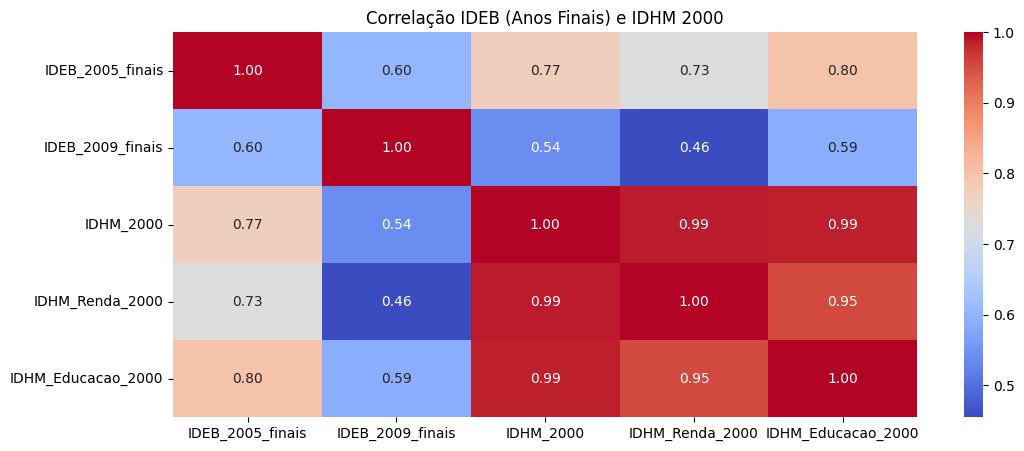

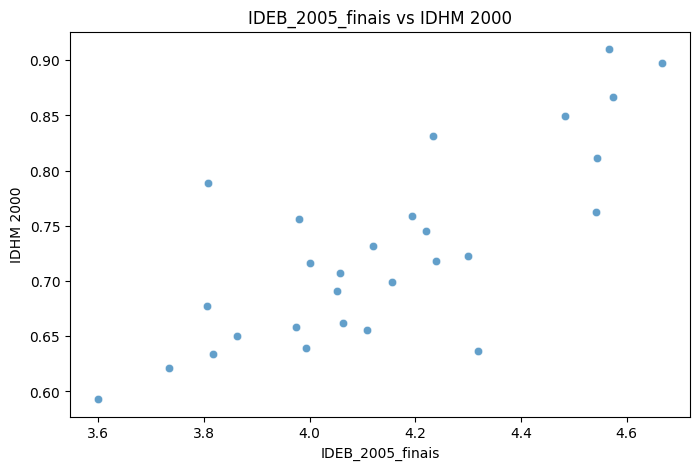

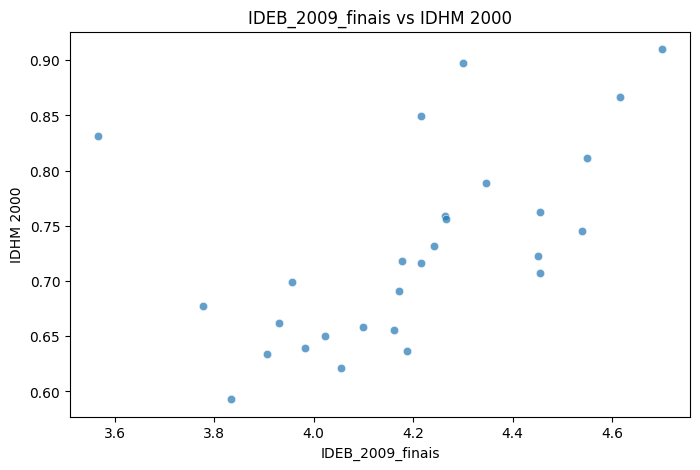


Estatísticas descritivas - IDEB (Anos Iniciais) e IDHM 2000
       IDEB_2005_iniciais  IDEB_2009_iniciais  IDHM_2000  IDHM_Renda_2000  \
count           28.000000           28.000000  28.000000        28.000000   
mean             4.134693            4.776948   0.728179         0.777036   
std              0.251941            0.237088   0.086244         0.106781   
min              3.733333            4.360870   0.593000         0.645000   
25%              3.952083            4.605357   0.657500         0.700500   
50%              4.080625            4.723958   0.717000         0.755500   
75%              4.279167            4.917157   0.768750         0.832000   
max              4.666667            5.466667   0.910000         1.000000   

       IDHM_Educacao_2000  
count           28.000000  
mean             0.619179  
std              0.104531  
min              0.436000  
25%              0.537750  
50%              0.607000  
75%              0.665750  
max              0.85

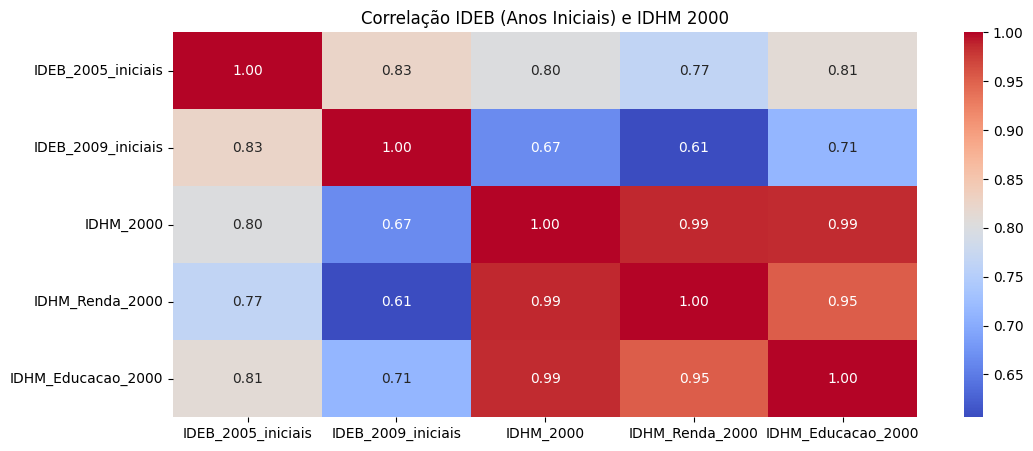

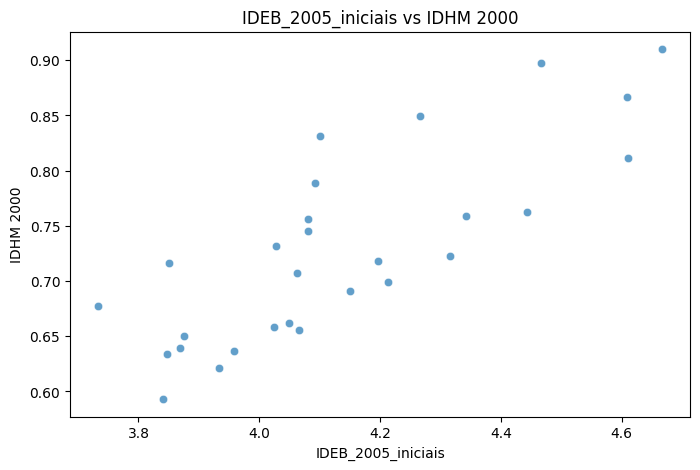

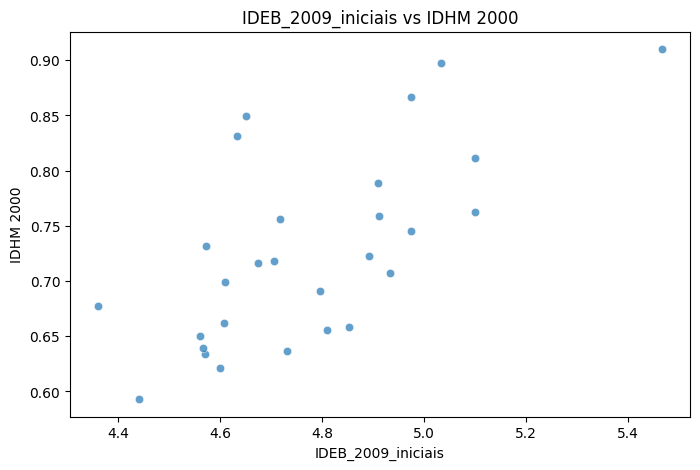


Estatísticas descritivas - IDEB (Anos Finais) e IDHM 2010
       IDEB_2011_finais  IDEB_2013_finais  IDEB_2015_finais  IDEB_2017_finais  \
count         28.000000         28.000000         28.000000         22.000000   
mean           4.407194          4.476282          4.443517          4.412190   
std            0.267248          0.192606          0.236696          0.501359   
min            3.965217          4.152174          4.000000          3.200000   
25%            4.233650          4.321023          4.282318          4.175000   
50%            4.414511          4.470417          4.462179          4.486905   
75%            4.583160          4.629762          4.608333          4.750000   
max            4.900000          4.930000          4.933333          5.100000   

       IDEB_2019_finais  IDHM_2010  IDHM_Renda_2010  IDHM_Educacao_2010  
count         28.000000  28.000000        28.000000           28.000000  
mean           4.886446   0.797500         0.804464            

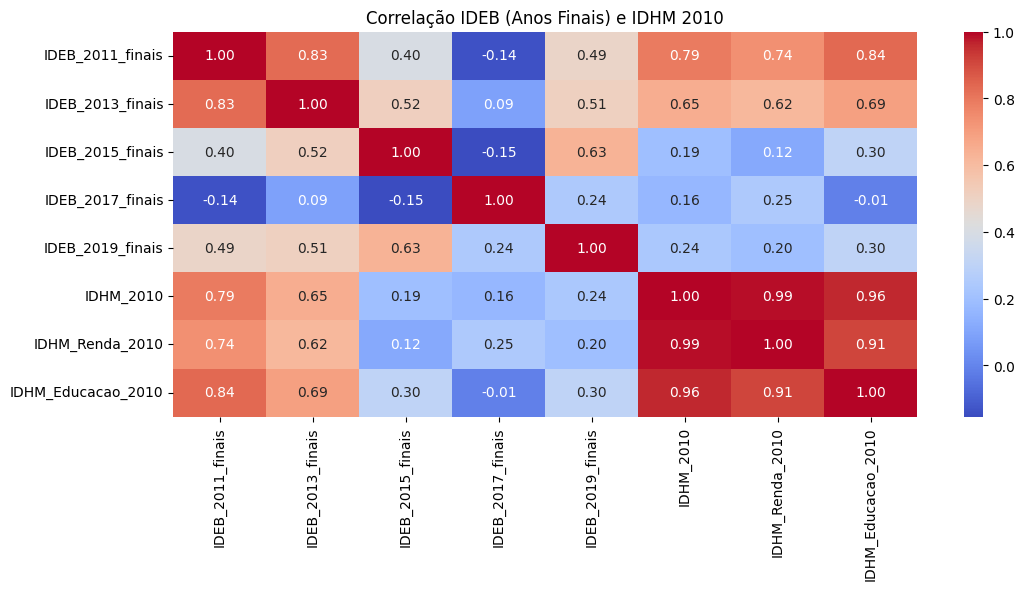

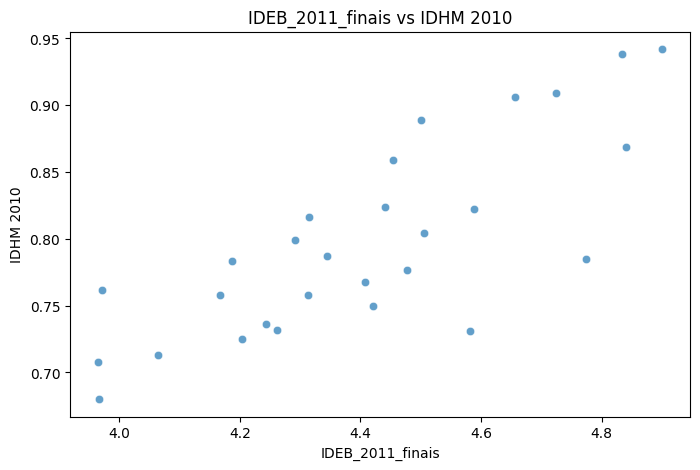

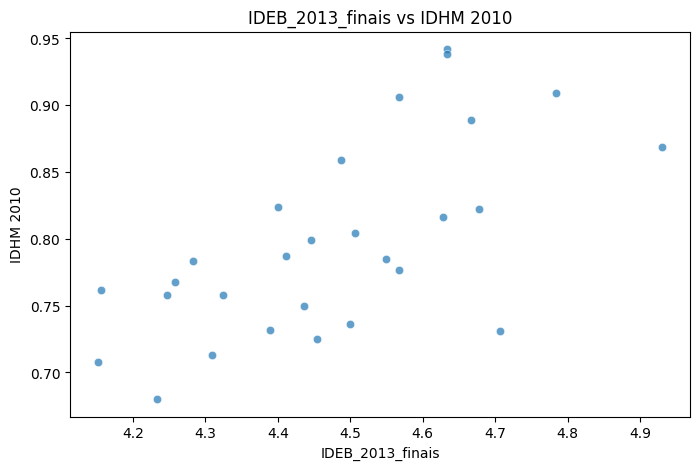

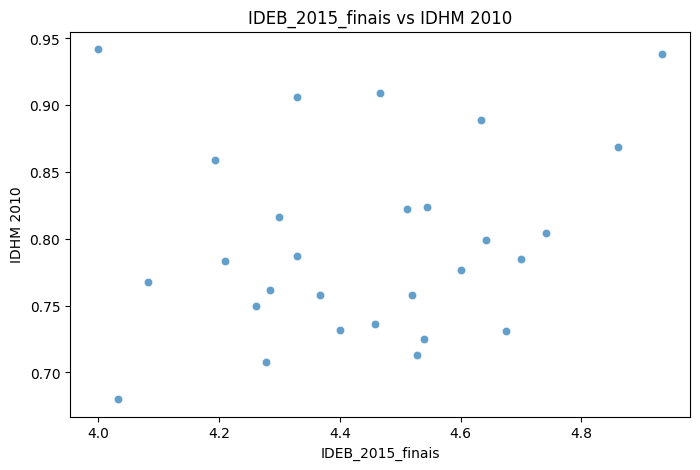

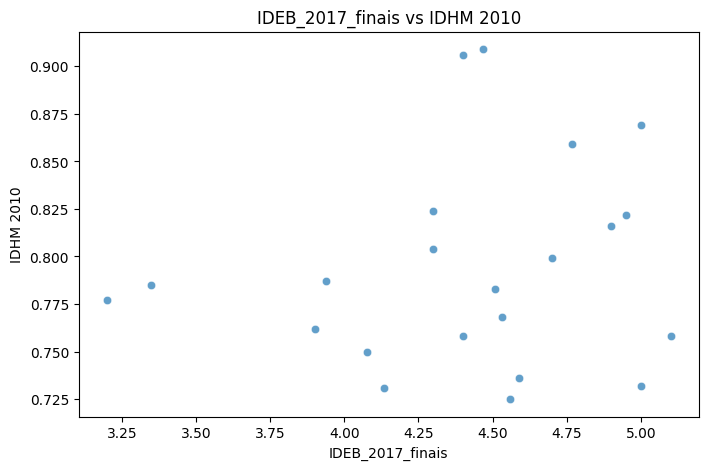

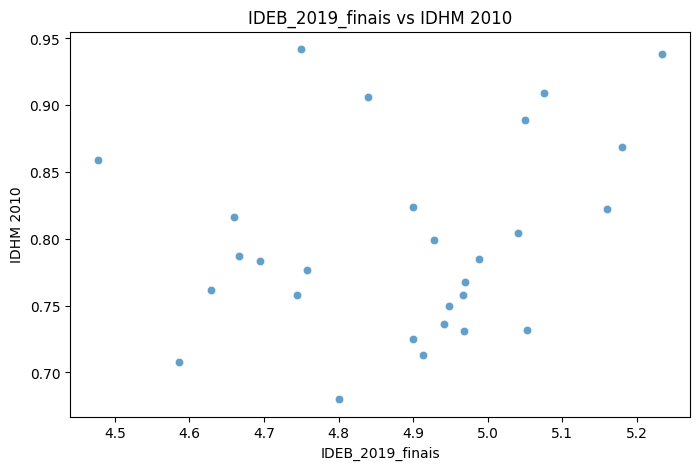


Estatísticas descritivas - IDEB (Anos Iniciais) e IDHM 2010
       IDEB_2011_iniciais  IDEB_2013_iniciais  IDEB_2015_iniciais  \
count           28.000000                 0.0           28.000000   
mean             4.872308                 NaN            5.875731   
std              0.231623                 NaN            0.214410   
min              4.458333                 NaN            5.480000   
25%              4.705966                 NaN            5.722187   
50%              4.863333                 NaN            5.852190   
75%              5.079228                 NaN            6.022500   
max              5.320000                 NaN            6.366667   

       IDEB_2017_iniciais  IDEB_2019_iniciais  IDHM_2010  IDHM_Renda_2010  \
count           28.000000           28.000000  28.000000        28.000000   
mean             6.130294            6.069616   0.797500         0.804464   
std              0.249812            0.244814   0.071723         0.106370   
min      

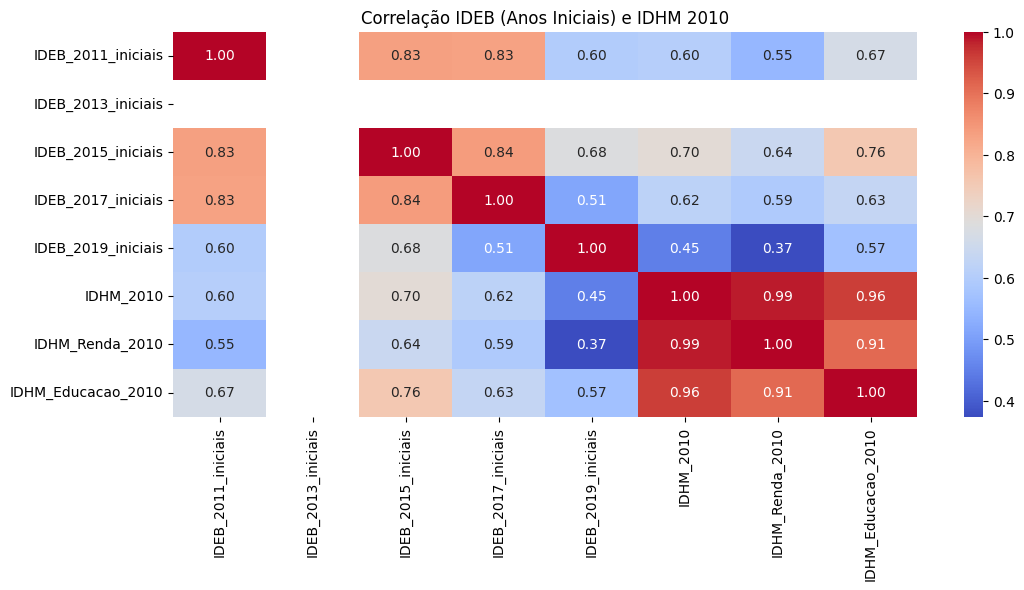

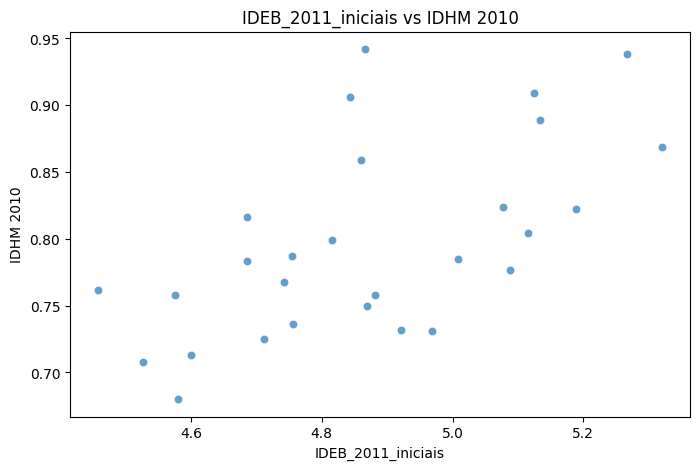

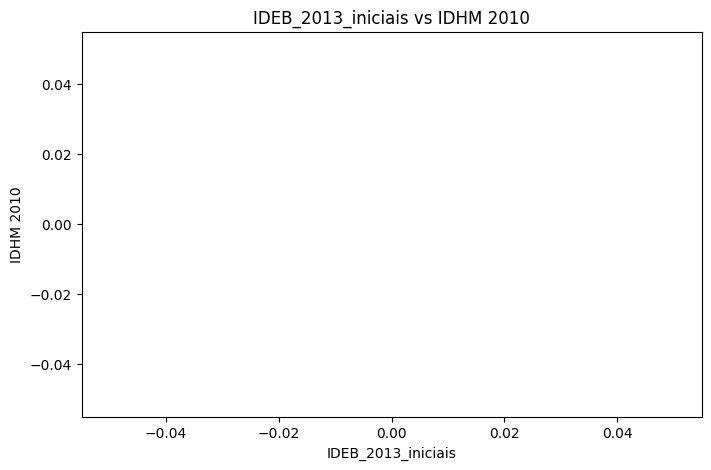

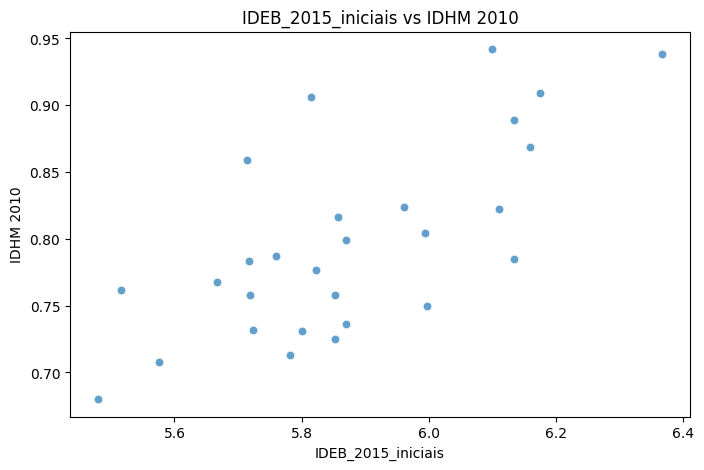

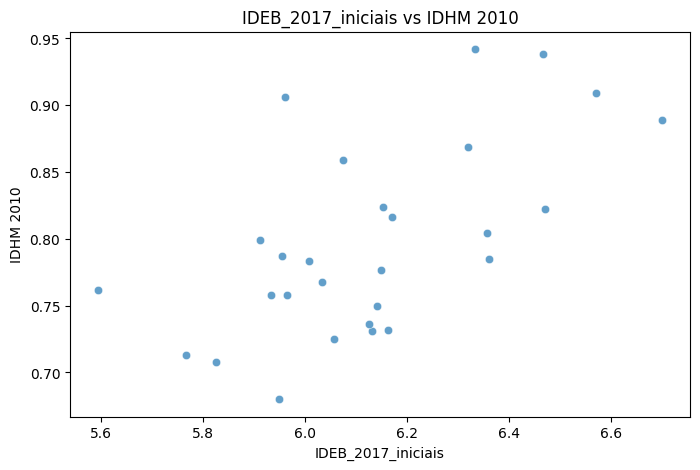

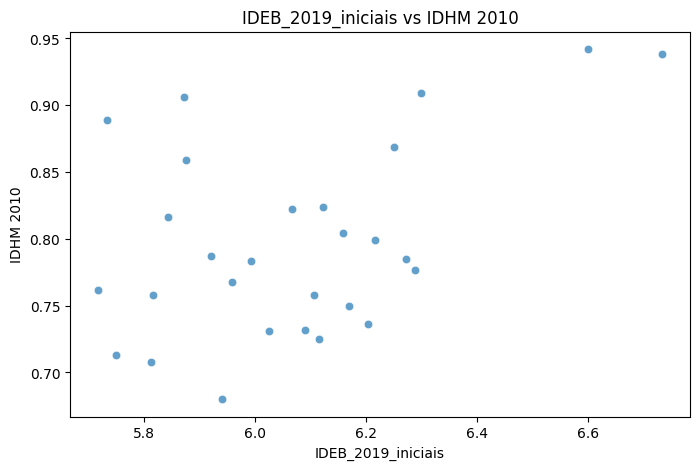


Estatísticas descritivas - IDEB (Anos Finais) e IDHM 2020
       IDEB_2021_finais  IDEB_2023_finais  IDHM_2020  IDHM_Renda_2020  \
count         24.000000         28.000000  28.000000        28.000000   
mean           5.257102          4.935793   0.874200         0.833130   
std            0.183995          0.207449   0.055790         0.107989   
min            4.883333          4.450000   0.779764         0.679347   
25%            5.152500          4.797500   0.832908         0.748665   
50%            5.247222          4.936429   0.865152         0.803762   
75%            5.400000          5.007812   0.903712         0.889991   
max            5.700000          5.480000   0.980874         1.025523   

       IDHM_Educacao_2020  
count           28.000000  
mean             0.863346  
std              0.031736  
min              0.806915  
25%              0.841418  
50%              0.867090  
75%              0.879102  
max              0.924321  


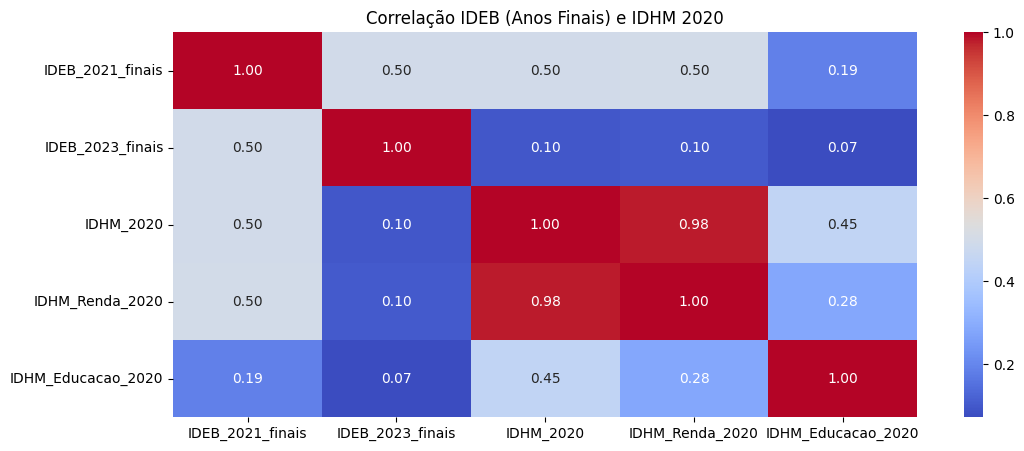

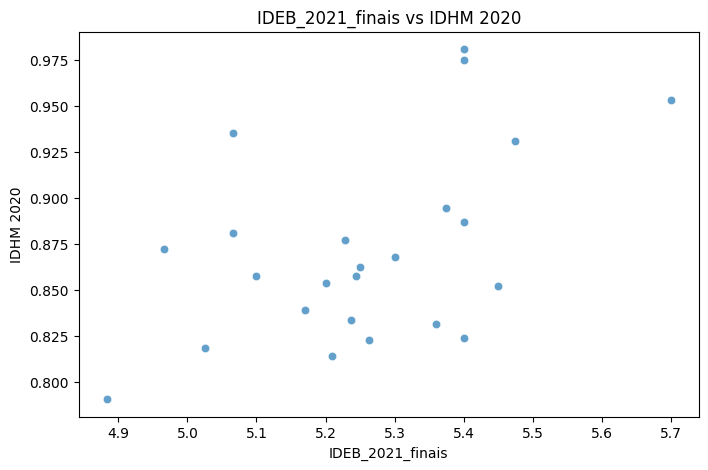

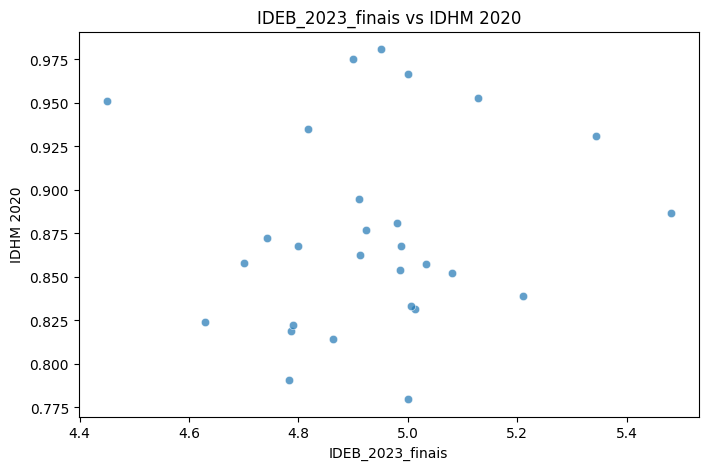


Estatísticas descritivas - IDEB (Anos Iniciais) e IDHM 2020
       IDEB_2021_iniciais  IDEB_2023_iniciais  IDHM_2020  IDHM_Renda_2020  \
count           28.000000           28.000000  28.000000        28.000000   
mean             5.727734            5.722829   0.874200         0.833130   
std              0.257089            0.288759   0.055790         0.107989   
min              5.100000            5.285000   0.779764         0.679347   
25%              5.571250            5.577708   0.832908         0.748665   
50%              5.683333            5.643571   0.865152         0.803762   
75%              5.876705            5.840625   0.903712         0.889991   
max              6.250000            6.800000   0.980874         1.025523   

       IDHM_Educacao_2020  
count           28.000000  
mean             0.863346  
std              0.031736  
min              0.806915  
25%              0.841418  
50%              0.867090  
75%              0.879102  
max              0.92

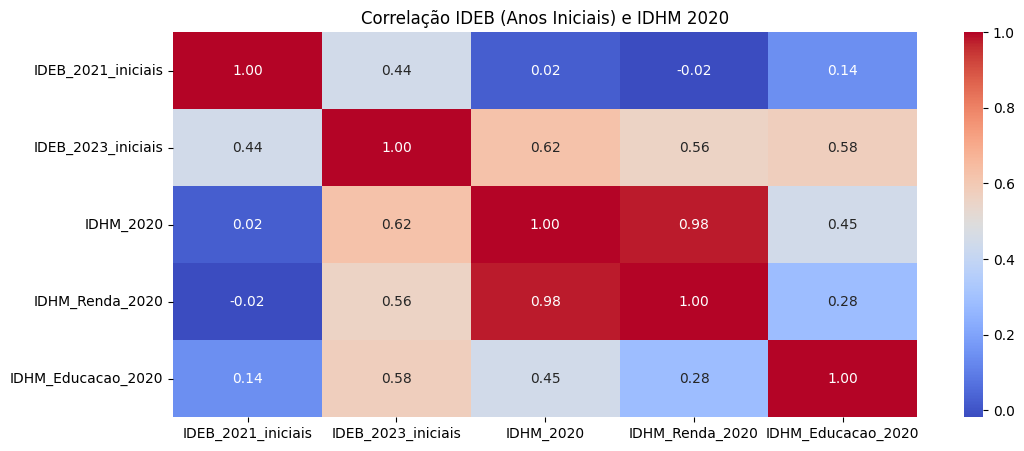

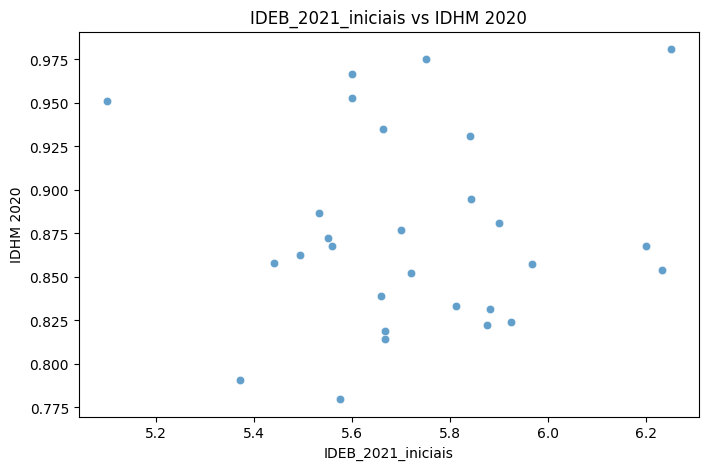

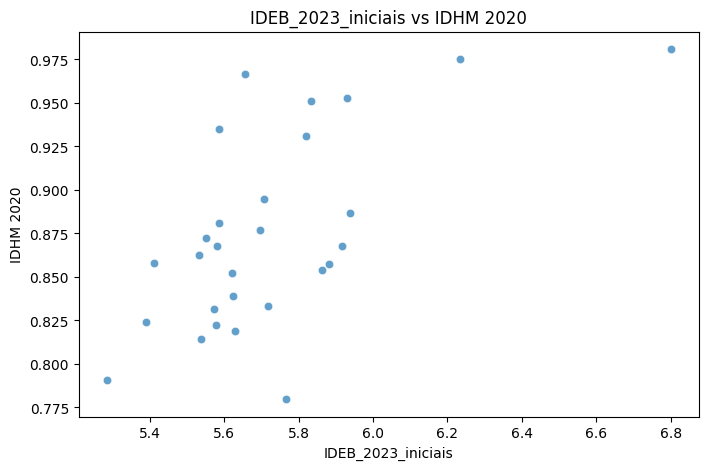

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os arquivos
file_idhm = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/idhm_subpref_anos.xlsx"
file_ideb_finais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_finais.xlsx"
file_ideb_iniciais = "/content/drive/MyDrive/Colab Notebooks/Pasta sem nome/ideb_anos_iniciais.xlsx"

idhm_df = pd.read_excel(file_idhm, sheet_name="subprefeitura")
ideb_finais_df = pd.read_excel(file_ideb_finais, sheet_name="Sheet1")
ideb_iniciais_df = pd.read_excel(file_ideb_iniciais, sheet_name="Sheet1")

# Converter para numérico e tratar valores ausentes
ideb_cols_finais_2000 = ["IDEB_2005_finais", "IDEB_2009_finais"]
ideb_cols_finais_2010 = ["IDEB_2011_finais", "IDEB_2013_finais", "IDEB_2015_finais", "IDEB_2017_finais", "IDEB_2019_finais"]
ideb_cols_finais_2020 = ["IDEB_2021_finais", "IDEB_2023_finais"]

ideb_cols_iniciais_2000 = ["IDEB_2005_iniciais", "IDEB_2009_iniciais"]
ideb_cols_iniciais_2010 = ["IDEB_2011_iniciais", "IDEB_2013_iniciais", "IDEB_2015_iniciais", "IDEB_2017_iniciais", "IDEB_2019_iniciais"]
ideb_cols_iniciais_2020 = ["IDEB_2021_iniciais", "IDEB_2023_iniciais"]

for col in ideb_cols_finais_2000 + ideb_cols_finais_2010 + ideb_cols_finais_2020:
    if col in ideb_finais_df.columns:
        ideb_finais_df[col] = pd.to_numeric(ideb_finais_df[col], errors='coerce')
for col in ideb_cols_iniciais_2000 + ideb_cols_iniciais_2010 + ideb_cols_iniciais_2020:
    if col in ideb_iniciais_df.columns:
        ideb_iniciais_df[col] = pd.to_numeric(ideb_iniciais_df[col], errors='coerce')

# Calcular a média do IDEB por Prefeitura Regional
ideb_finais_media_2000 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2000].mean().reset_index()
ideb_finais_media_2010 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2010].mean().reset_index()
ideb_finais_media_2020 = ideb_finais_df.groupby("Prefeitura Regional")[ideb_cols_finais_2020].mean().reset_index()

ideb_iniciais_media_2000 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2000].mean().reset_index()
ideb_iniciais_media_2010 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2010].mean().reset_index()
ideb_iniciais_media_2020 = ideb_iniciais_df.groupby("Prefeitura Regional")[ideb_cols_iniciais_2020].mean().reset_index()

# Unir com os dados do IDHM
idhm_2000 = idhm_df[["Prefeitura Regional", "IDHM_2000", "IDHM_Renda_2000", "IDHM_Educacao_2000"]]
idhm_2010 = idhm_df[["Prefeitura Regional", "IDHM_2010", "IDHM_Renda_2010", "IDHM_Educacao_2010"]]
idhm_2020 = idhm_df[["Prefeitura Regional", "IDHM_2020", "IDHM_Renda_2020", "IDHM_Educacao_2020"]]

def merge_and_analyze(ideb_df, idhm_df, title):
    df = pd.merge(ideb_df, idhm_df, on="Prefeitura Regional", how="inner")
    print(f"\nEstatísticas descritivas - {title}")
    print(df.describe())

    df_corr = df.select_dtypes(include=['number'])  # Manter apenas colunas numéricas
    plt.figure(figsize=(12, 5))
    sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlação {title}")
    plt.show()

    for ideb_col in [col for col in df.columns if "IDEB" in col]:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[ideb_col], y=df["IDHM_" + title[-4:]], alpha=0.7)
        plt.title(f"{ideb_col} vs IDHM {title[-4:]}")
        plt.xlabel(ideb_col)
        plt.ylabel(f"IDHM {title[-4:]}")
        plt.show()

# Análises para cada período
merge_and_analyze(ideb_finais_media_2000, idhm_2000, "IDEB (Anos Finais) e IDHM 2000")
merge_and_analyze(ideb_iniciais_media_2000, idhm_2000, "IDEB (Anos Iniciais) e IDHM 2000")
merge_and_analyze(ideb_finais_media_2010, idhm_2010, "IDEB (Anos Finais) e IDHM 2010")
merge_and_analyze(ideb_iniciais_media_2010, idhm_2010, "IDEB (Anos Iniciais) e IDHM 2010")
merge_and_analyze(ideb_finais_media_2020, idhm_2020, "IDEB (Anos Finais) e IDHM 2020")
merge_and_analyze(ideb_iniciais_media_2020, idhm_2020, "IDEB (Anos Iniciais) e IDHM 2020")